<a href="https://colab.research.google.com/github/queleandrade/Extra-o_de_dados_do_twitter_analiseResultados/blob/main/TensorFlow_vers%C3%A3o2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.3 MB/s 
     |████████████████████████████████| 212 kB 44.1 MB/s 
Using TensorFlow version 2.8.2


Downloading:   0%|          | 0.00/3.41k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/6.01k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/204k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/84e07cd366f4451464584cdbd4958f512bcaddb1e921341e07298ce8a9ce42f4. Subsequent calls will reuse this data.
{'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000), 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000), 'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}
Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000)


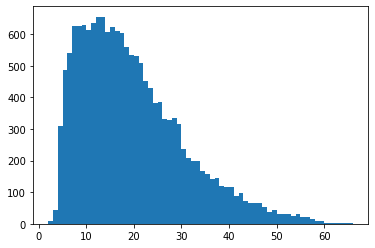

{'surprise', 'anger', 'joy', 'fear', 'sadness', 'love'}


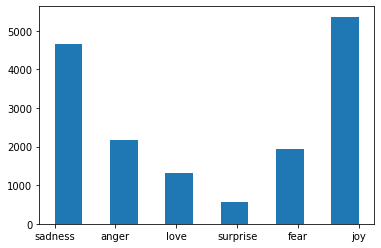

4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
500/500 [============================

0.75

In [ ]:
!pip install nlp

%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random

#função que plota dos gráficos da emoções, acurácia...

def show_history(h):
    epochs_trained = len(h.history['loss']) #determinando o quanto os valores previstos se desviam dos valores reais nos dados de treinamento
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs') #epochs Indica o número de passagens de todo o conjunto de dados de treinamento que o algoritmo de aprendizado de máquina concluiu 
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    

    #função para matriz de confusão
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__) #mostrando a versão do tf

'''
import pandas as pd
val = pd.read_excel("BaseAtualizadaVal.xlsx")
train = pd.read_excel("BaseAtualizadaTreinamento.xlsx")
test = pd.read_excel("BaseAtualizadaTeste.xlsx")
'''
dataset = nlp.load_dataset('emotion')
print(dataset)

train = dataset['train']
val = dataset['validation']
test = dataset['test']

def get_tweet(data):
  tweets = [x['text'] for x in data]
  labels = [x['label'] for x in data]
  return tweets, labels 
#dataset = nlp.load_dataset('emotion') #baixando o conjunto de dados com as emoções do nlp


tweets, labels = get_tweet(train)

tweets[0], labels[0]


from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>') #oov_token='UNK': isso adicionará um token UNK ao vocabulário.  o índice de UNK é word_count+1.
tokenizer.fit_on_texts(tweets)

tokenizer.texts_to_sequences([tweets[0]])

tweets[0]

lenghts = [len(t.split(' ')) for t in tweets]
plt.hist(lenghts, bins = len(set(lenghts)))
plt.show()

maxlen = 50
from tensorflow.keras.preprocessing.sequence import pad_sequences

def get_sequences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating='post', padding='post', maxlen=maxlen)
  return padded

padded_train_seq = get_sequences(tokenizer, tweets)

padded_train_seq[0]

classes = set(labels)
print(classes)

plt.hist(labels, bins=11)
plt.show()

class_to_index = dict((c,i) for i, c in enumerate(classes))
index_to_class = dict((v,k) for k, v in class_to_index.items())

class_to_index

index_to_class

names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])

train_labels = names_to_ids(labels)
print(train_labels[0])

maxlen = 50
from tensorflow.keras.preprocessing.sequence import pad_sequences

model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(10000, 16, input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
        tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

#treinamento do modelo

val_tweets, val_labels = get_tweet(val)
val_seq = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

val_tweets[0], val_labels[0]


h = model.fit(
    padded_train_seq, train_labels,
    validation_data=(val_seq, val_labels),
    epochs=20,
    callbacks=[
            tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)


#curva roc

tf.keras.metrics.AUC(
    num_thresholds=200, curve='ROC',
    summation_method='interpolation', name=None, dtype=None,
    thresholds=None, multi_label=False, num_labels=None, label_weights=None,
    from_logits=False
)

m = tf.keras.metrics.AUC(num_thresholds=3)
m.update_state([0, 0, 1, 1], [0, 0.5, 0.3, 0.9])

m.result().numpy()
